# Alpha Vantage API 
* Activate the blocks of code
* Enter in your stock symbol
* Enter what time series you would like to see

In [1]:
#Alpha Vatange API APP

import requests
import numpy as np
import pandas as pd
import json as js
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def fetch_symbol(stock):
    return requests.get(api_root + api_series + stock + api, stream=False).json()

In [3]:
def company_symbol():
    try:
        stc = ''
        while not stc:
            stc = input("What stock would you like to view? ")
            stc = stc.upper()
        stock = fetch_symbol(stc)
        if len(stc) == 0:
            print("Please enter a symbol.")
    except requests.exceptions.ConnectionError:
        print("Couldn't connect to server! Please check the network?")
    return stock, stc

In [4]:
def series():
    """This function promts the user for the desired
    time series. Day, week, month, etc"""
    while True:
        t_type = input('Please enter time series you would like to see. ' \
                  'Daily[1], Weekly[2], Monthly[3]: ')
        if t_type == '1':
            t_type = 'Time Series (Daily)'
            return t_type
        elif t_type == '2':
            t_type = 'Weekly Time Series'
            return t_type
        elif t_type == '3':
            t_type = 'Monthly Time Series'
            return t_type
        else:
            print('Error')
            print(t_type)
            continue
    return t_type

In [5]:
def time_series(t_series):
    """The time_series function takes the selected time series and return
    the correct format for the url to retrive the symbol time series"""
    #try except block here    
    if t_series == 'Time Series (Daily)':
        api_series = '/query?function=TIME_SERIES_DAILY&symbol='
        return api_series
    elif t_series == 'Weekly Time Series':
        api_series = '/query?function=TIME_SERIES_WEEKLY&symbol='
        return api_series
    elif t_series == 'Monthly Time Series':
        api_series = '/query?function=TIME_SERIES_MONTHLY&symbol='
        return api_series
    else:
        print('Error')

In [6]:
t_series = series()
api_root = 'https://www.alphavantage.co'
api_series = time_series(t_series)
api = '&apikey=EKFVA2O5LEO3WL88'
fhand, stc = company_symbol()

Please enter time series you would like to see. Daily[1], Weekly[2], Monthly[3]: 1
What stock would you like to view? fnma
Couldn't connect to server! Please check the network?


UnboundLocalError: local variable 'stock' referenced before assignment

## This Block loops through the file handle to extract the date and price of the stock for that date

In [103]:
def createDframe(fhand):
    """This function finds the date and price for the selected stock
    and creates and returns the dataframe"""
    lst = []
    for key, values in fhand.items():
        if key == t_series:
            for date, sinfo in values.items():
                #Finds the date and values for stock
                for cols, nums in sinfo.items():
                    #finds the closing price
                    if cols == '4. close':
                        #create list for date and price key values
                        lst.append([date,nums])     
    df = pd.DataFrame(lst,columns=['Date','Price'])
    df.sort_index(ascending=False, inplace=True)
    return df

In [104]:
createDframe(fhand).head()

,Date,Price
99,2018-12-10,1.2000
98,2018-12-11,1.1800
97,2018-12-12,1.1400
96,2018-12-13,1.1300
95,2018-12-14,1.1300


In [105]:
def createDframe2(fhand):
    """This function finds the date and volume for the selected stock
    and creates and returns the dataframe"""
    lst = []
    for key, values in fhand.items():
        if key == t_series:
            for date, sinfo in values.items():
                #Finds the date and values for stock
                for cols, vol in sinfo.items():
                    #finds the volume
                    if cols == '5. volume':
                        #create list for date and volume key values
                        lst.append([date,vol])
            

    df = pd.DataFrame(lst,columns=['Date','Volume'])
    df.sort_index(ascending=False, inplace=True)
    return df

In [106]:
createDframe2(fhand).head()

,Date,Volume
99,2018-12-10,4341718
98,2018-12-11,2381355
97,2018-12-12,4513631
96,2018-12-13,1554453
95,2018-12-14,1693598


<IPython.core.display.Javascript object>


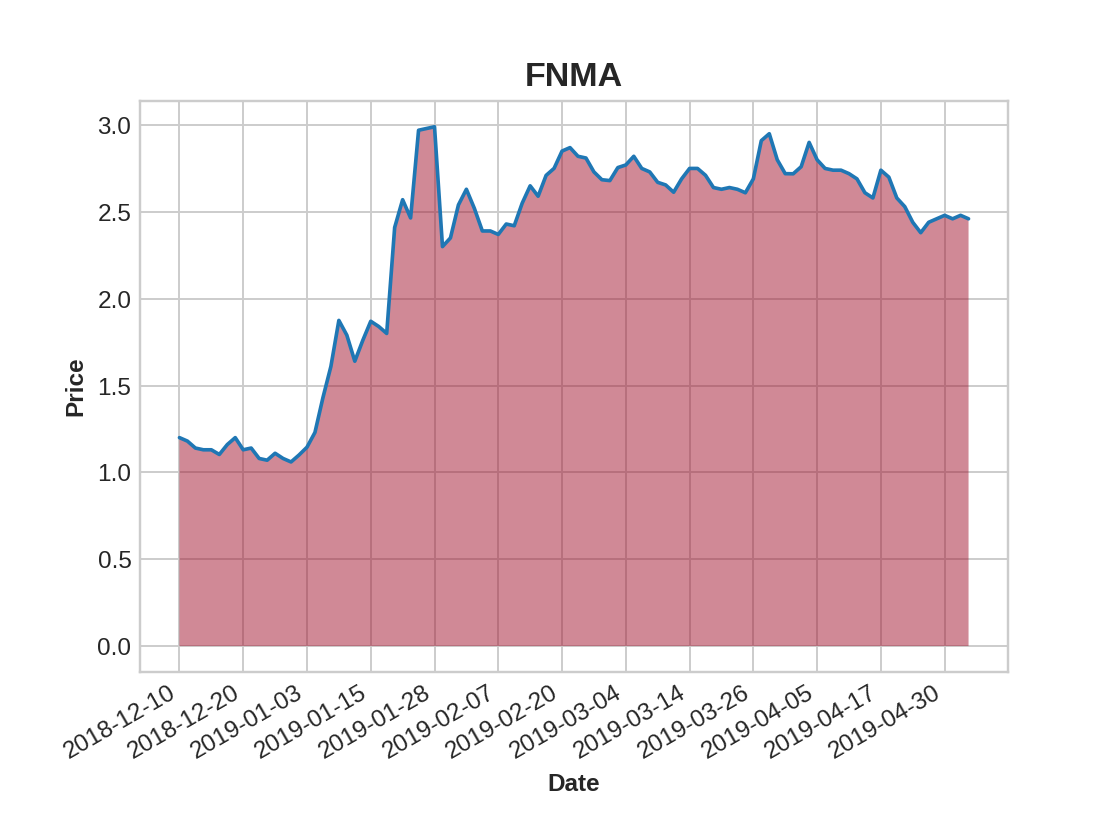

Text(0.5,1,'FNMA')

In [121]:
"""Price Chart
Format the xticker right to line up
add fill between and color format line
try to change style and click_on"""
%matplotlib notebook
df = createDframe(fhand)
price = df['Price'].astype(float)
date = df.Date.astype('O')
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
plt.plot(date, price)
plt.fill_between(date, price, facecolor='#A2142F', alpha=0.5)
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Price', fontsize=10, fontweight='bold')
plt.title(stc, fontsize=14, fontweight='bold')

<IPython.core.display.Javascript object>


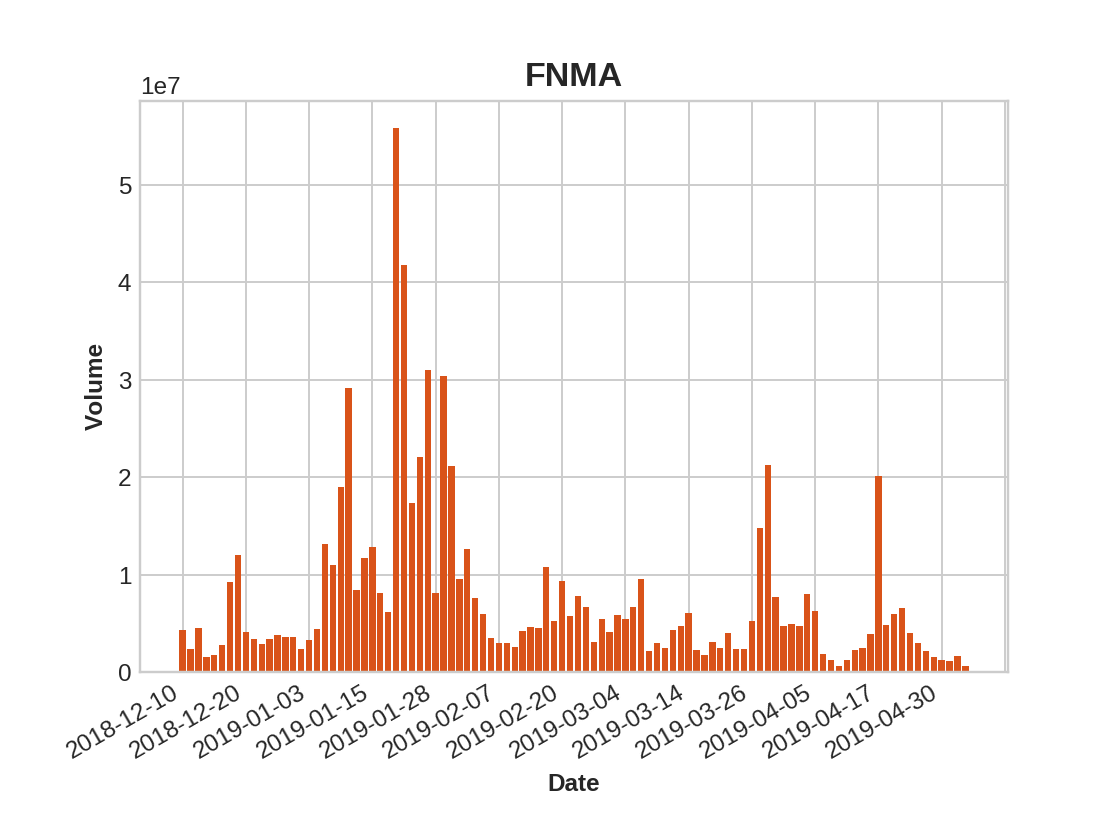

Text(0.5,1,'FNMA')

In [122]:
"""Volume Chart
Format the xticker right to line up
add fill between and color format line
try to change style and click_on"""
%matplotlib notebook
df = createDframe2(fhand)
vol = df['Volume'].astype(float)
date = df.Date.astype('O')
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
plt.bar(date, vol, color='#D95319',)
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Volume', fontsize=10, fontweight='bold')
plt.title(stc, fontsize=14, fontweight='bold')

In [13]:
df.describe()

count    1.000000e+02
mean     8.186103e+07
std      3.651231e+07
min      3.473184e+07
25%      5.419084e+07
50%      7.435283e+07
75%      1.058064e+08
max      2.114212e+08
Name: Volume, dtype: float64

In [14]:
# had to reset the index to use info()
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Date      100 non-null object
Volume    100 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Object `fill` not found.
